In [24]:
import os
from datetime import datetime
import pandas as pd
from sodapy import Socrata
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
window = datetime(2024,1,1,0,0).strftime('%Y-%m-%dT%H:%M:%S')

In [25]:
username = os.getenv('username')
password = os.getenv('password')
token = os.getenv('token')

In [26]:
client = Socrata("data.cityofchicago.org",
                 f"{token}",
                 username=f"{username}",
                 password=f"{password}")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2", where=f"date>='{window}'", limit = 1000000000000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [27]:
results_df.shape

(241221, 22)

In [31]:
results_df['date'] = pd.to_datetime(results_df['date'])

In [32]:
results_df.dtypes

id                              object
case_number                     object
date                    datetime64[ns]
block                           object
iucr                            object
primary_type                    object
description                     object
location_description            object
arrest                            bool
domestic                          bool
beat                            object
district                        object
ward                            object
community_area                  object
fbi_code                        object
x_coordinate                    object
y_coordinate                    object
year                            object
updated_on                      object
latitude                        object
longitude                       object
location                        object
dtype: object

In [39]:
start_time = pd.Timestamp('05:30:00').time()
end_time = pd.Timestamp('07:00:00').time()

filtered_df = results_df[(results_df['date'].dt.time >= start_time) &
                 (results_df['date'].dt.time <= end_time)]

In [35]:
filtered_df.shape

(8426, 22)

In [37]:
filtered_df[['primary_type','community_area']].value_counts()

primary_type  community_area
THEFT         28                140
BATTERY       25                 91
NARCOTICS     23                 83
THEFT         24                 77
              32                 75
                               ... 
ARSON         32                  1
              30                  1
              29                  1
              1                   1
              23                  1
Name: count, Length: 949, dtype: int64

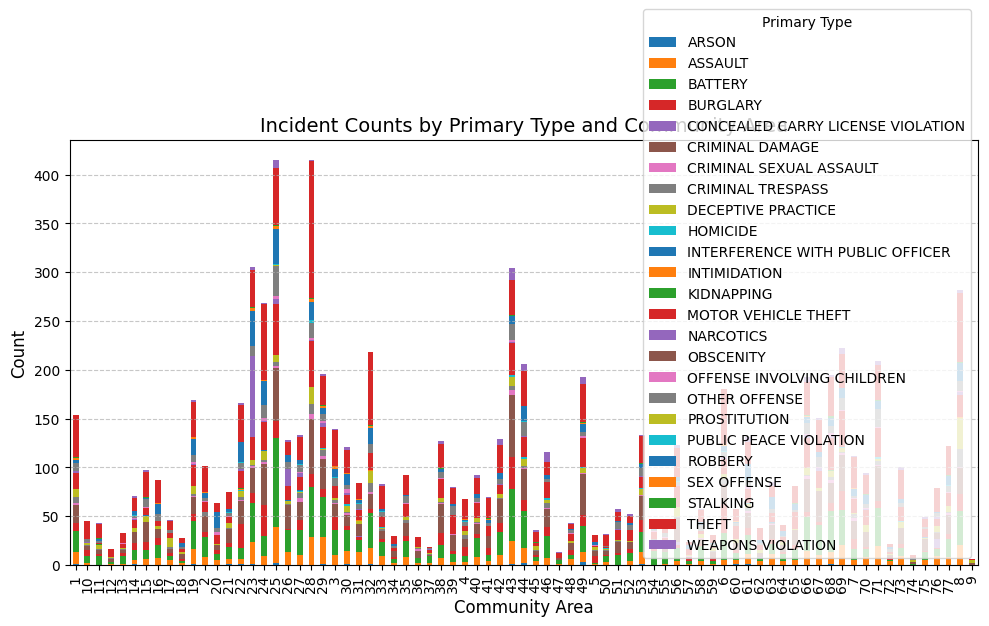

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating value counts for primary_type and community_area
value_counts = filtered_df[['primary_type', 'community_area']].value_counts().reset_index()
value_counts.columns = ['primary_type', 'community_area', 'count']

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Pivoting the data for better visualization
pivot_table = value_counts.pivot(index='community_area', columns='primary_type', values='count').fillna(0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Adding chart details
plt.title("Incident Counts by Primary Type and Community Area", fontsize=14)
plt.xlabel("Community Area", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Primary Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
url = 'https://en.wikipedia.org/wiki/Community_areas_in_Chicago'
tables = pd.read_html(url)

# Display the number of tables found
print(f"Number of tables found: {len(tables)}")

# Assuming the first table is the one you want
df = tables[0]

Number of tables found: 4


In [57]:
df

,com_nbr,name,pop,area_sq_mi,area_sq_km,pop_per_sq_mi,pop_per_sq_km
0,01,Rogers Park,55628,1.84,4.77,30232.61,11672.81
1,02,West Ridge,77122,3.53,9.14,21847.59,8435.36
2,03,Uptown,57182,2.32,6.01,24647.41,9516.37
3,04,Lincoln Square,40494,2.56,6.63,15817.97,6107.32
4,05,North Center,35114,2.05,5.31,17128.78,6613.42
...,...,...,...,...,...,...,...
73,74,Mount Greenwood,18628,2.71,7.02,6873.80,2653.97
74,75,Morgan Park,21186,3.30,8.55,6420.00,2478.76
75,76,O'Hare,13418,13.34,34.55,1005.85,388.36
76,77,Edgewater,56296,1.74,4.51,32354.02,12491.89


In [52]:
df.columns = ['_'.join(col).strip() for col in df.columns]

In [56]:
df.columns = ['com_nbr','name','pop','area_sq_mi','area_sq_km','pop_per_sq_mi','pop_per_sq_km']